<a href="https://colab.research.google.com/github/rileydixon6/machine_learning_practice/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import altair as alt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np


campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
campaign

age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 20 columns]

In [ ]:
 
column_list = list(campaign.columns)
for i in column_list:
  print(campaign[i].value_counts())

In [ ]:

y = campaign[campaign['y'] == 'yes']
columny_list = list(y.columns)
for i in columny_list:
  print(y[i].value_counts())

new_data = pd.DataFrame(y.value_counts())

In [ ]:
pd.set_option('display.max_rows', 500)

columny_list = list(y.columns)
for i in columny_list:
  print(y[i].value_counts() / campaign[i].value_counts())

In [ ]:
c = campaign['age'].value_counts().sort_index()

campaign = campaign.replace('unknown', np.nan)

campaign['to_29'] = campaign.apply(lambda x: 1 if x['age'] <= 29 else 0, axis = 1)
campaign['to_32'] = campaign.apply(lambda x: 1 if x['age'] <= 32 and x['age'] > 29 else 0, axis = 1)
campaign['to_35'] = campaign.apply(lambda x: 1 if x['age'] <= 35 and x['age'] > 32 else 0, axis = 1)
campaign['to_39'] = campaign.apply(lambda x: 1 if x['age'] <= 39 and x['age'] > 35 else 0, axis = 1)
campaign['to_44'] = campaign.apply(lambda x: 1 if x['age'] <= 44 and x['age'] > 39 else 0, axis = 1)
campaign['to_44'] = campaign.apply(lambda x: 1 if x['age'] <= 44 and x['age'] > 39 else 0, axis = 1)
campaign['to_51'] = campaign.apply(lambda x: 1 if x['age'] <= 51 and x['age'] > 44 else 0, axis = 1)
campaign['to_98'] = campaign.apply(lambda x: 1 if x['age'] <= 98 and x['age'] > 51 else 0, axis = 1)


#campaign.filter(regex = 'to_').map({True : 1 , False : 0},axis = 0)


campaign = campaign.drop(columns = ['age'])

ru = RandomUnderSampler()
ro = RandomOverSampler()

In [ ]:
encoded = pd.get_dummies(campaign)
X = encoded.drop(columns = ['y_no','y_yes'])
y = encoded['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 3)

X, y = ru.fit_resample(X, y)

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
feature_dat = pd.DataFrame({
    "values": tree_clf.feature_importances_,
    "features": X_train.columns
    }) 
alt.Chart(feature_dat.query('values > .02'),title = "Most Important Features").encode(
    alt.X('values'), 
    alt.Y('features', sort = "-x")).mark_bar()

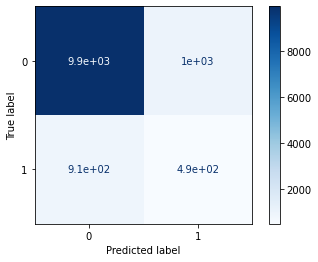

In [ ]:
tree_clf = tree.DecisionTreeClassifier()

tree_clf.fit(X_train,y_train)

feature_dat = pd.DataFrame({
    "values": tree_clf.feature_importances_,
    "features": X_train.columns
    }) 
alt.Chart(feature_dat.query('values > .02'),title = "Most Important Features").encode(
    alt.X('values'), 
    alt.Y('features', sort = "-x")).mark_bar()

alt.Chart(...)

In [ ]:

accuracy_score(y_test,y_pred)


0.8438132232742575

In [ ]:
alt.data_transformers.disable_max_rows()

euribor = {'euribor' : campaign['euribor3m'], 'term' : campaign['y']}
euribor = pd.DataFrame(data = euribor)
euribor['low'] = euribor.apply(lambda x: "Below 3%" if x['euribor'] < 3 else "Above 3%", axis = 1)

chart = alt.Chart(euribor).encode(
    alt.X('low', title = "Euribor Rate"), 
    y = 'count(low)', 
    color = 'term'
    ).properties(
        title = "Euribor Three Month Rate"
    ).mark_bar()
chart
#euribor

alt.Chart(...)

In [ ]:
num_employ = {'employed' : campaign['nr.employed'], 'term' : campaign['y']}
num_employ = pd.DataFrame(data = num_employ)
#num_employ['low'] = euribor.apply(lambda x: "Below 3%" if x['euribor'] < 3 else "Above 3%", axis = 1)

chart2 = alt.Chart(num_employ).encode(
    alt.X('employed:O',title = "Unemployment Rate"), 
    alt.Y('count(employed):O'), 
    color = 'term'
    ).properties(
        title = "Amount of term deposits vs. Portugal Unemployment Rate"
    ).mark_bar()
chart2

alt.Chart(...)

In [ ]:
campaign['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64